In [2]:
import numpy as np
import cv2
import os
import keras
import xml.etree.cElementTree as ET
import random
import matplotlib.pyplot as plt
import traceback

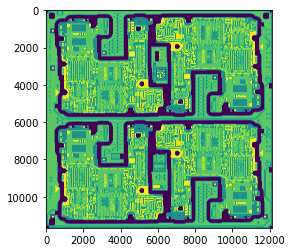

In [2]:
im1 = cv2.imread("D:\\nas\\MasterData\\Color\\N971N(CSI1672M)\\Back_CAM_v3.tif")

gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [9]:
gray.shape[0]

11668

In [2]:
x_data = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\Defect" 
if not os.path.exists(x_data):
    os.makedirs(x_data)

In [3]:
y_data = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\False" 
if not os.path.exists(y_data):
    os.makedirs(y_data)

In [2]:
DEFECT = []
FALSE = []

In [11]:
def parse_xml(fl):
    n = 1826
    for i in os.walk(fl):
      for files in i[-1]:
        if files[-13:]=="_BC_Label.xml":
            print(i[0])
            print(files)
            folder_path=str(i[0])+"/"
            file_path=folder_path+str(files)
        #    print(os.path.isfile(file_path))
            
            with open(file_path, 'r') as fc:
                try:
                    tree = ET.fromstring(fc.read())
                    tree = ET.ElementTree(tree)
                    root = tree.getroot()
                    if root.tag == 'data':
                        for child in root:
                            if child.tag == 'point':
                                for point in child:
                                    try:
                                        req_keys = ['img_merge_idx', 'img_pt_x', 'img_pt_y', 'def_side', 'Label','strip_pt_x', 'strip_pt_y']

                                        all_keys_found = True
                                        for k in req_keys:
                                            if k not in point.attrib.keys():
                                                all_keys_found = False
                                       # print(all_keys_found)

                                        if all_keys_found:

                                            img_pt_x = round(float(point.attrib['img_pt_x']))
                                            img_pt_y = round(float(point.attrib['img_pt_y']))

                                            pt_x = round(float(point.attrib['strip_pt_x']))
                                            pt_y = round(float(point.attrib['strip_pt_y']))

                                            img_merge_idx = point.attrib['img_merge_idx']
                                            def_side = point.attrib['def_side']
                                            curr_dir = os.path.dirname(file_path)
                                            print(curr_dir)

                                            img_fname = def_side + 'C_p' + img_merge_idx + '.tif'

                                            img_path = os.path.join(curr_dir, img_fname)
                                            img = cv2.imread(img_path)

                                            if img is None:
                                                continue


                                            label = str(point.attrib['Label'])


                                            # test_real
                                            pos1 = np.asarray([pt_x, pt_y])

                                            print(pos1)

                                            im1 = cv2.imread("Back_CAM_v3.tif")
                                            gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

                                          
                                            px1 = int(pos1[1])

                                            start_x1 = max(0, px1 - 150) #max(0, px1)# - cx2)
                                            end_x1 = min(gray.shape[1] - 1, start_x1 + 300) #min(gray.shape[0], px1 + cx2)

                                            py1 = int(pos1[0])
                                          

                                            start_y1 = max(0, py1 - 150)  #max(0, py1)# - cy2) 
                                            end_y1 = min(gray.shape[0] - 1, start_y1 + 300) #min(gray.shape[1], py1 + cy2)

                                          

                                           # print(gray)
                                            gray = gray[start_y1:end_y1, start_x1:end_x1] #[start_x1:end_x1, start_y1:end_y1]
                                            #print(gray)
                                          #  plt.imshow(gray)
                                            gray = cv2.resize(gray, (300, 300))
                                            
                                            im1 = im1[start_y1:end_y1, start_x1:end_x1]
                                            im1 = cv2.resize(im1, (300, 300))

                                          #  cv2.imwrite('gray.png', gray)


                                           # plt.imshow(gray)


                                            result = np.dstack((img, gray))   
                                            result2 = np.hstack((img, im1))
                                            print(result.shape)

                                            cropped_file_name = str(n) + '.npy'
                                            cropped_file_name2 = str(n) + '.tif'
                                            n += 1


                                            if label == 'DEFECT':
                                              #  DEFECT.append(result)
                                                x = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\Defect" + "\\" + cropped_file_name
                                                np.save(x, result)
                                                
                                                x1 = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\Defect\\4" + "\\" + cropped_file_name2
                                                cv2.imwrite(x1, result2)


                                            elif label == 'FALSE':
                                               # FALSE.append(result)
                                                y = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\False" + "\\" + cropped_file_name
                                                np.save(y, result)
                                                
                                                y1 = "D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\False\\4" + "\\" + cropped_file_name2
                                                cv2.imwrite(y1, result2)

                                            else:
                                                pass

                                    except:
                                        traceback.print_exc()
                                        print('Skipping point: ', point)
                                #    n += 1

                except:
                    print('Skipping file:', files)


In [12]:
parse_xml("D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\662689-03-0000-80\\4")

D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
S0001_BC_Label.xml
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[8000  223]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[8000  225]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[7835  359]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[7835  360]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[7829  360]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[6651 7863]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[6651 7863]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[6651 7864]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0001
[6651 7864]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(C

(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0010
[2486 1575]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0010
[8526 6958]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0011
S0011_BC_Label.xml
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0011
[267 330]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0011
[4181 5080]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0012
S0012_BC_Label.xml
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0012
[11113   355]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0012
[9063  462]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0012
[4003 1443]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0012
[9049 2648]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\

(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0027
[2037 7931]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0027
[ 7616 10869]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0027
[ 7616 10869]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0027
[ 4541 11426]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0028
S0028_BC_Label.xml
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0028
[3452  170]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0028
[2813 6960]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0028
[ 4541 11407]
(300, 300, 4)
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0029
S0029_BC_Label.xml
D:\nas\ResultData\Data\AFVI11\N971N(CSI1672M)\662689-03-0000-80\4\0029
[6866 1592]
(300, 300, 4)
D:\nas\ResultData\Data

In [4]:
DEFECT

[]

In [21]:
DEFECT[100].shape

(300, 300, 4)

In [22]:
cropped_file_name = str(1) + '.npy'

In [23]:
np.save("D:\\nas\\ResultData\\Data\\AFVI11\\N971N(CSI1672M)\\661748-01-0000-01\\1\\0001\\Defect" + "\\" + cropped_file_name, DEFECT[100])

In [4]:
loaded_array1 = np. load("E:\\dataset_4_channel\\Train\\Defect\\1.npy")
loaded_array1.shape

(300, 300, 4)

In [5]:
x = []

In [6]:
x.append(loaded_array1)

In [7]:
loaded_array2 = np. load("E:\\dataset_4_channel\\Train\\Defect\\2.npy")
loaded_array2.shape

(300, 300, 4)

In [8]:
x.append(loaded_array2)

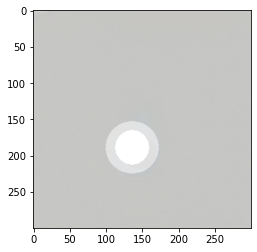

In [12]:
plt.imshow(x[0])

In [27]:
f = []

In [28]:
f.append(1)

In [30]:
np.array(f)

array([1])